In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score, RocCurveDisplay,
                             PrecisionRecallDisplay, precision_recall_curve,classification_report, confusion_matrix,
                             f1_score, ConfusionMatrixDisplay, roc_curve, plot_confusion_matrix)
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import GridSearchCV
import os

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}

<IPython.core.display.Javascript object>

In [3]:
#Directory for all images
dir_path = "Results"
if not os.path.isdir(dir_path):
    os.mkdir(dir_path, exist_ok=True)

In [4]:
data = pd.read_csv('cardio_updated.csv')
data

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis,BMI
0,50,Male,168,62,110,80,Normal,Normal,No,No,Yes,No,22.0
1,55,Female,156,85,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,52,Female,165,64,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,48,Male,169,82,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,48,Female,156,56,100,60,Normal,Normal,No,No,No,No,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68670,53,Male,168,76,120,80,Normal,Normal,Yes,No,Yes,No,26.9
68671,62,Female,158,126,140,90,High,High,No,No,Yes,Yes,50.5
68672,52,Male,183,105,180,90,Extremely High,Normal,No,Yes,No,Yes,31.4
68673,61,Female,163,72,135,80,Normal,High,No,No,No,Yes,27.1


In [5]:
feature_names = data.columns
feature_names

Index(['Age', 'Gender', 'Height', 'Weight', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Cholesterol', 'Glucose', 'Smoking',
       'Alcohol Intake', 'Physical Activity', 'Diagnosis', 'BMI'],
      dtype='object')

In [6]:
data.describe()

,Age,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,BMI
count,68675.000000,68675.000000,68675.000000,68675.000000,68675.000000,68675.000000
mean,53.324703,164.360757,74.108191,126.595632,81.293163,27.516620
std,6.768655,8.184283,14.322178,16.638589,9.378968,6.048801
min,30.000000,55.000000,11.000000,60.000000,40.000000,3.500000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.900000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.300000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.100000
max,65.000000,250.000000,200.000000,240.000000,120.000000,298.700000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68675 entries, 0 to 68674
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       68675 non-null  int64  
 1   Gender                    68675 non-null  object 
 2   Height                    68675 non-null  int64  
 3   Weight                    68675 non-null  int64  
 4   Systolic Blood Pressure   68675 non-null  int64  
 5   Diastolic Blood Pressure  68675 non-null  int64  
 6   Cholesterol               68675 non-null  object 
 7   Glucose                   68675 non-null  object 
 8   Smoking                   68675 non-null  object 
 9   Alcohol Intake            68675 non-null  object 
 10  Physical Activity         68675 non-null  object 
 11  Diagnosis                 68675 non-null  object 
 12  BMI                       68675 non-null  float64
dtypes: float64(1), int64(5), object(7)
memory usage: 6.8+ MB


In [8]:
#Checking for missing values
data.isnull().sum()

Age                         0
Gender                      0
Height                      0
Weight                      0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Cholesterol                 0
Glucose                     0
Smoking                     0
Alcohol Intake              0
Physical Activity           0
Diagnosis                   0
BMI                         0
dtype: int64

Based on this, we can say that there are no missing values in any feature of our dataset

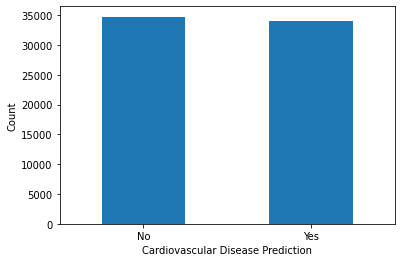

In [9]:
# This can be used to check the value of each target classification to 
# ensure that the dataset is correctly balanced
# This can ensure that our model will not be biased
target_value_counts = data['Diagnosis'].value_counts()
target_value_counts.plot(kind="bar")
plt.xlabel("Cardiovascular Disease Prediction")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

This shows the Dataset is balanced

In [10]:
columns = ['Gender', 'Cholesterol', 'Glucose', 'Smoking', 'Alcohol Intake', 'Physical Activity', 'Diagnosis']
data[columns] = data[columns].apply(LabelEncoder().fit_transform)
data[columns] = data[columns].apply(LabelEncoder().fit_transform)
data

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis,BMI
0,50,1,168,62,110,80,2,2,0,0,1,0,22.0
1,55,0,156,85,140,90,0,2,0,0,1,1,34.9
2,52,0,165,64,130,70,0,2,0,0,0,1,23.5
3,48,1,169,82,150,100,2,2,0,0,1,1,28.7
4,48,0,156,56,100,60,2,2,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68670,53,1,168,76,120,80,2,2,1,0,1,0,26.9
68671,62,0,158,126,140,90,1,1,0,0,1,1,50.5
68672,52,1,183,105,180,90,0,2,0,1,0,1,31.4
68673,61,0,163,72,135,80,2,1,0,0,0,1,27.1


In [11]:
X = data.drop(['Diagnosis'],axis=1)
Y = data['Diagnosis']
print(X.shape)
print(Y.shape)

(68675, 12)
(68675,)


In [12]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

## Decision Tree

In [13]:
def make_decision_tree(X_train, Y_train, X_test, Y_test, max_depth = None) :
    decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth = max_depth)
    model=decision_tree.fit(X_train, Y_train)
    predict =model.predict(X_test)
    accuracy=accuracy_score(predict,Y_test)
    print("Accuracy Score {}:".format(accuracy))
    return decision_tree

In [14]:
#Decision Tree Classifier with default max_depth = None
decision_tree = make_decision_tree(X_train, Y_train, X_test, Y_test)

Accuracy Score 0.6384419366581725:


### Using K-Fold Cross Validation Method 

In [15]:
def cross_validation(model, X, y, cv = 5) :
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,X=X,y=y,cv=cv,scoring=_scoring,return_train_score=True)
    return results

In [16]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy",random_state=0)
results = cross_validation(decision_tree_model, X, Y, 5)
print("Train Accuracy {}".format(results['train_accuracy']))
print("Test Accuracy {}".format(results['test_accuracy']))
print("-----------------------------------------")
print("Train Precision {}".format(results['train_precision']))
print("Train Precision {}".format(results['test_precision']))
print("-----------------------------------------")
print("Train Recall {}".format(results['train_recall']))
print("Train Recall {}".format(results['test_recall']))
print("-----------------------------------------")
print("Train F1 {}".format(results['train_f1']))
print("Train F1 {}".format(results['test_f1']))
print("-----------------------------------------")

Train Accuracy [0.97584638 0.97564616 0.97562796 0.97595559 0.97661085]
Test Accuracy [0.63523844 0.64382963 0.63989807 0.64084456 0.63290863]
-----------------------------------------
Train Precision [0.99369362 0.99437148 0.99406857 0.99411045 0.99453385]
Train Precision [0.63542301 0.64462054 0.63952785 0.63951916 0.63345033]
-----------------------------------------
Train Recall [0.95721807 0.95615036 0.95640809 0.95703398 0.95795287]
Train Recall [0.61502209 0.62297496 0.62238586 0.62680412 0.61125018]
-----------------------------------------
Train F1 [0.97511486 0.97488644 0.97487475 0.97521994 0.97590068]
Train F1 [0.62505613 0.63361294 0.63084042 0.63309781 0.62215228]
-----------------------------------------


In [17]:
def plot_metrics(x_label, y_label, plot_title, file_title, train_data, val_data) :
    plt.figure(figsize=(12,6))
    labels = ["1st", "2nd", "3rd", "4th", "5th"]
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Testing')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(dir_path,file_title))
    plt.show()

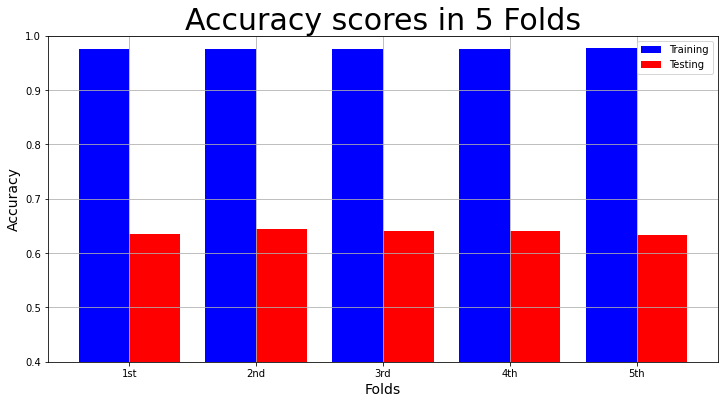

In [18]:
#Accuracy Score
plot_metrics("Folds",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            "Decision_Tree_KFold_Accuracy.png",
            results["train_accuracy"],
            results["test_accuracy"])

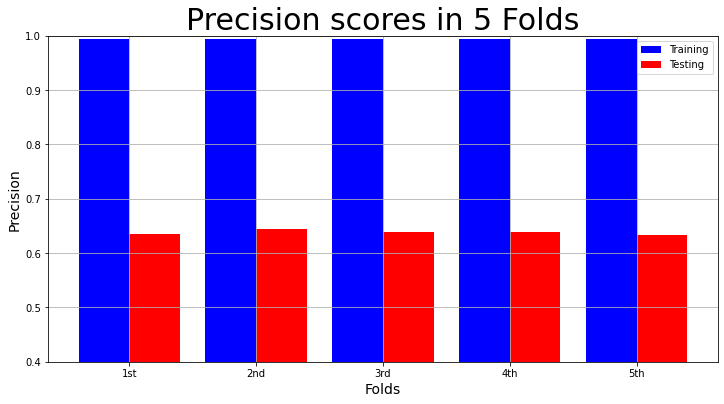

In [19]:
#Precision Score
plot_metrics("Folds",
            "Precision",
            "Precision scores in 5 Folds",
             "Decision_Tree_KFold_Precision.png",
            results["train_precision"],
            results["test_precision"])

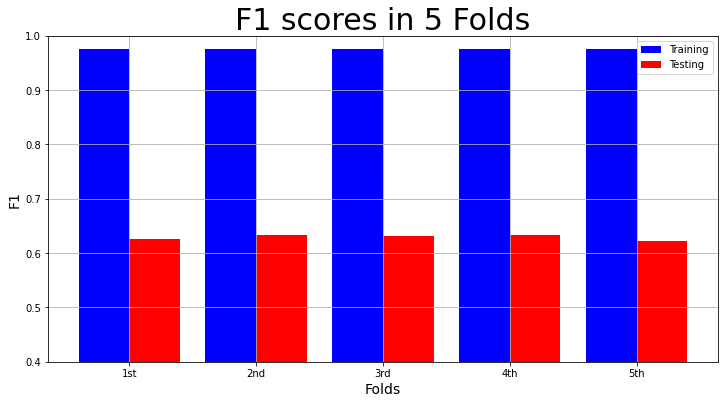

In [20]:
#F1 score
plot_metrics("Folds",
            "F1",
            "F1 scores in 5 Folds",
             "Decision_Tree_KFold_F1.png",
            results["train_f1"],
            results["test_f1"])

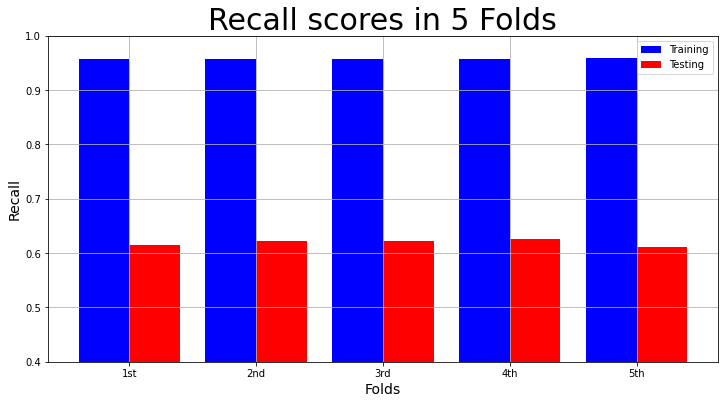

In [21]:
#Recall Score
plot_metrics("Folds",
            "Recall",
            "Recall scores in 5 Folds",
            "Decision_Tree_KFold_Recall.png",
            results["train_recall"],
            results["test_recall"])

Based on the visualizations the training accuracy, prediction, recall and f1 score are very high as compared to the test score which means that the model is overfitting.
One parameter that could be modified is the min_samples_split which is set as 2 by default. We could change this value to 5 to check the result of the model

## Hyperparameter Tuning with GridSearchCV

In [22]:
param_grid = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,None],
    "min_samples_split": [2,5,7,10,15,20],
    "min_samples_leaf": [25,50,100,125,150,200,225,250,275,300,325,350],
}


clf = DecisionTreeClassifier(criterion="entropy")
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, Y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(Y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(Y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 8, 'min_samples_leaf': 225, 'min_samples_split': 2}
CV score for GS 0.795366950702265
Train AUC ROC Score for GS:  0.733941601416533
Test AUC ROC Score for GS:  0.7291790221656592


## Training the Model 

In [23]:
def visualize_decision_tree(decision_tree):
    dot_data = export_graphviz(decision_tree,out_file=None,feature_names = X.columns,class_names=["0", "1"],filled=True,rounded=True)
    graph = graphviz.Source(dot_data)
    graph.render("DecisionTree",directory="Results",format="png", view=False)
    display(graph)

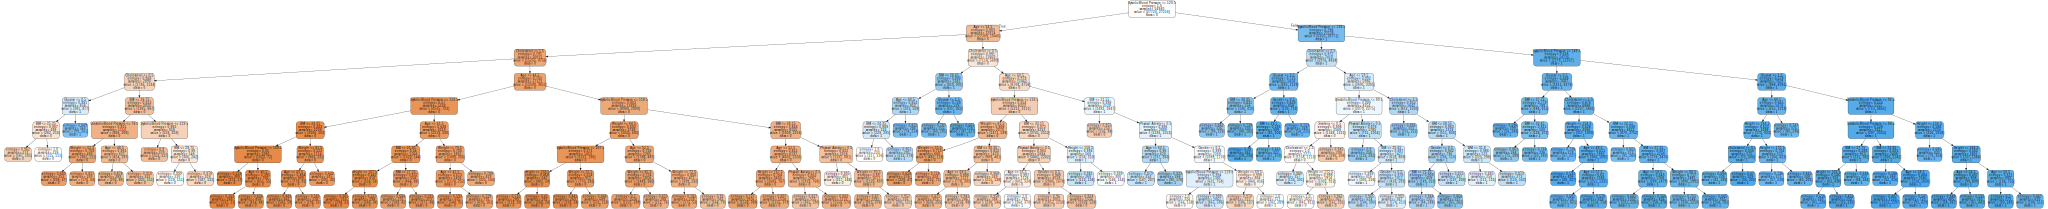

In [24]:
clf = DecisionTreeClassifier(criterion="entropy",
                             max_depth = grid_cv.best_params_['max_depth'],
                             min_samples_leaf = grid_cv.best_params_['min_samples_leaf'], 
                             min_samples_split = grid_cv.best_params_['min_samples_split'])
model=clf.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
visualize_decision_tree(model)

## Evaluation Metrics

In [25]:
# Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score {}:".format(accuracy))

Accuracy Score 0.7300327630141973:


In [26]:
# Precision Score
precision = precision_score(Y_test, Y_pred)
print("Precision Score {}:".format(precision))

Precision Score 0.74415228262623:


In [27]:
# Recall Score
recall = recall_score(Y_test, Y_pred)
print("Recall Score {}:".format(recall))

Recall Score 0.6849294729027469:


In [28]:
# F1 Score
f1 = f1_score(Y_test, Y_pred)
print("F1 Score {}:".format(f1))

F1 Score 0.7133137467140869:


In [29]:
# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report")
print(class_report)

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7000
           1       0.74      0.68      0.71      6735

    accuracy                           0.73     13735
   macro avg       0.73      0.73      0.73     13735
weighted avg       0.73      0.73      0.73     13735



Confusion Matrix


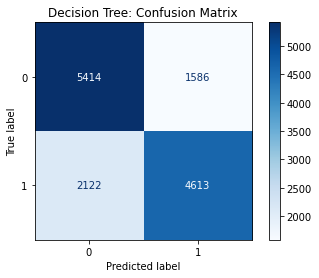

In [30]:
# Confusion Matrix
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, values_format='g')
print("Confusion Matrix")
plt.title("Decision Tree: Confusion Matrix")
plt.savefig(os.path.join(dir_path,"Decision_Tree_Confusion_Matrix.png"))
plt.show()

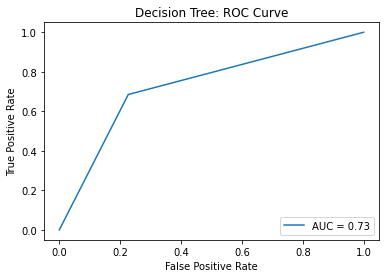

In [31]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()
plt.title("Decision Tree: ROC Curve")
plt.savefig(os.path.join(dir_path,"Decision_Tree_ROC.png"))
plt.show()

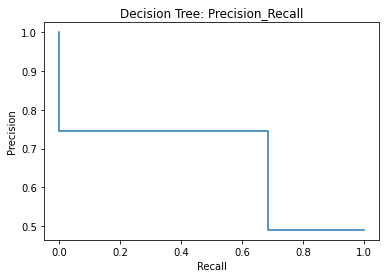

In [32]:
#Precision Recall Curve
prec, rec, thresholds_2 = precision_recall_curve(Y_test, Y_pred)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()
plt.title("Decision Tree: Precision_Recall")
plt.savefig(os.path.join(dir_path,"Decision_Tree_Precision_Recall.png"))
plt.show()